In [5]:
from torch.utils.data import DataLoader
import torchvision
import torch
from torchvision import transforms


train_transform = transforms.Compose([
    transforms.RandomRotation(10, fill=(0,)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.8, contrast=0.8),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

In [2]:
# Vanilla MLP
import torch.nn as nn
import torch.nn.functional as F

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 30)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(30, 30)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(30, 10)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

dnn_model = DNN()

# Print the model architecture
print(dnn_model)

total_params = sum(p.numel() for p in dnn_model.parameters())
print(f"Number of parameters in the model: {total_params}")

DNN(
  (fc1): Linear(in_features=784, out_features=30, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=10, out_features=10, bias=True)
)
Number of parameters in the model: 24900


In [6]:
# MLP with Batch Norm
import torch.nn as nn
import torch.nn.functional as F

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(30, 30)
        self.bn2 = nn.BatchNorm1d(30)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(30, 10)
        self.bn3 = nn.BatchNorm1d(10)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

dnn_model = DNN()

# Print the model architecture
print(dnn_model)

total_params = sum(p.numel() for p in dnn_model.parameters())
print(f"Number of parameters in the model: {total_params}")

DNN(
  (fc1): Linear(in_features=784, out_features=30, bias=True)
  (bn1): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (bn2): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=10, out_features=10, bias=True)
)
Number of parameters in the model: 25040


In [6]:
# MLP with Batch Norm and dropout
import torch.nn as nn
import torch.nn.functional as F

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)  # Adjust dropout rate as needed
        
        self.fc2 = nn.Linear(30, 30)
        self.bn2 = nn.BatchNorm1d(30)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(30, 10)
        self.bn3 = nn.BatchNorm1d(10)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)
        
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Move the model to the specified device
dnn_model = DNN().to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer (using Adam optimizer)
optimizer = optim.SGD(dnn_model.parameters(), lr=.02, momentum=.95, weight_decay=0.001)
#optimizer = optim.AdamW(dnn_model.parameters(), lr=.01, weight_decay=.01)

# Number of training iterations
num_iterations = 25

# Training loop
for epoch in range(num_iterations):
    running_loss = 0.0
    
    # Training phase
    dnn_model.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # Move inputs and labels to the specified device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = dnn_model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        """
        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:  # Print every 100 mini-batches
            print('[%d, %5d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
        """
    # Validation phase
    dnn_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = dnn_model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print('Epoch %d - Accuracy on the test set: %.2f%%' % (epoch + 1, accuracy * 100))

print('Training finished!')

cuda
Epoch 1 - Accuracy on the test set: 89.63%
Epoch 2 - Accuracy on the test set: 93.51%
Epoch 3 - Accuracy on the test set: 93.39%
Epoch 4 - Accuracy on the test set: 94.46%
Epoch 5 - Accuracy on the test set: 94.71%
Epoch 6 - Accuracy on the test set: 94.56%
Epoch 7 - Accuracy on the test set: 94.75%
Epoch 8 - Accuracy on the test set: 93.78%
Epoch 9 - Accuracy on the test set: 95.38%
Epoch 10 - Accuracy on the test set: 95.11%
Epoch 11 - Accuracy on the test set: 95.07%
Epoch 12 - Accuracy on the test set: 95.00%
Epoch 13 - Accuracy on the test set: 95.27%
Epoch 14 - Accuracy on the test set: 94.81%
Epoch 15 - Accuracy on the test set: 94.80%
Epoch 16 - Accuracy on the test set: 95.10%
Epoch 17 - Accuracy on the test set: 95.06%
Epoch 18 - Accuracy on the test set: 95.13%
Epoch 19 - Accuracy on the test set: 94.99%
Epoch 20 - Accuracy on the test set: 95.42%
Epoch 21 - Accuracy on the test set: 95.17%
Epoch 22 - Accuracy on the test set: 94.63%
Epoch 23 - Accuracy on the test set:

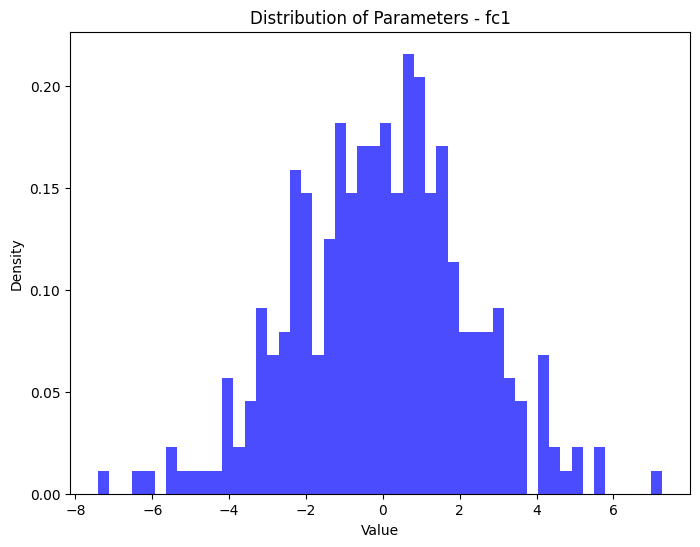

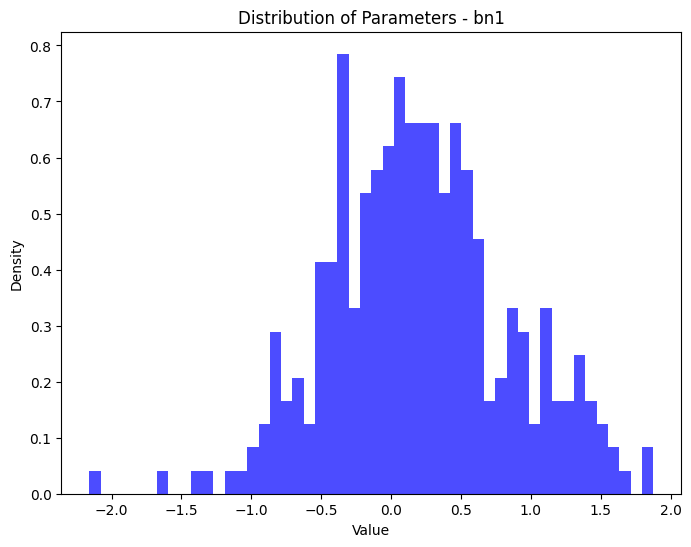

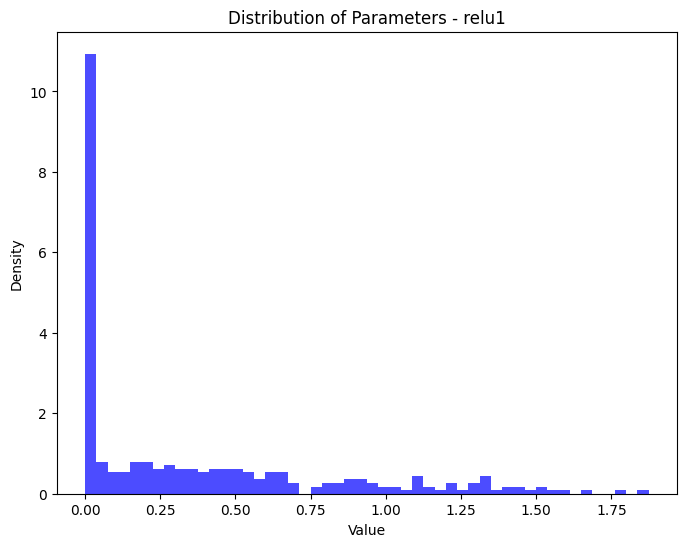

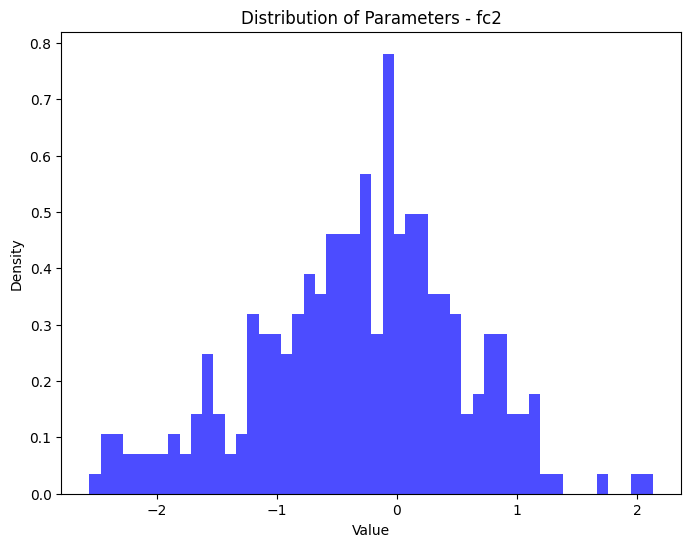

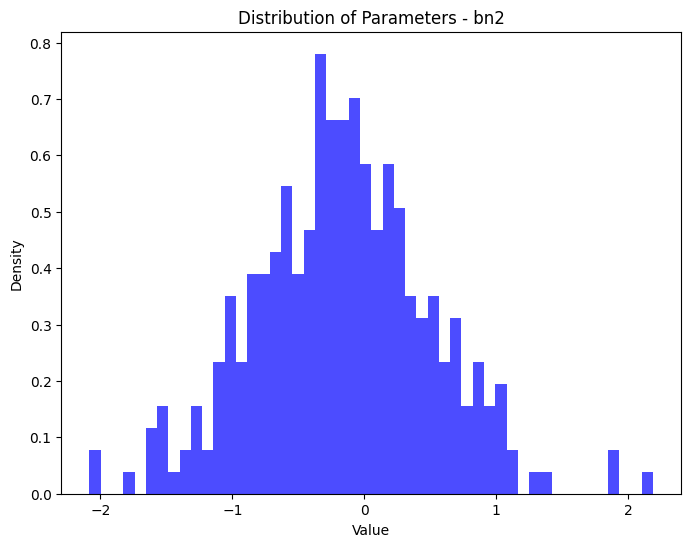

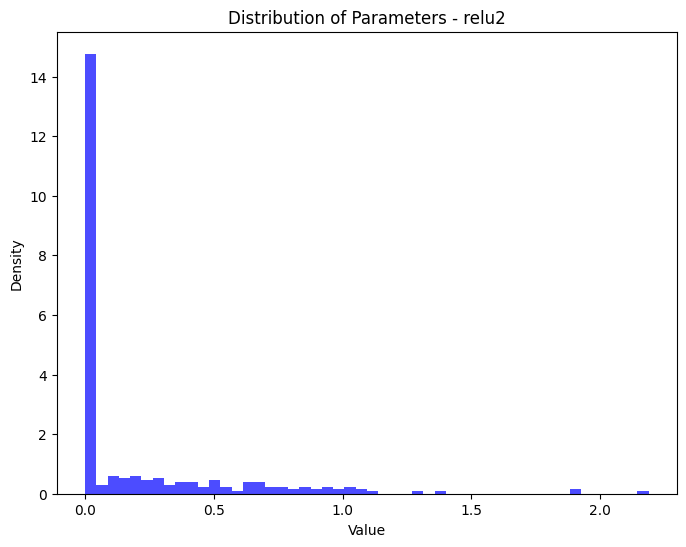

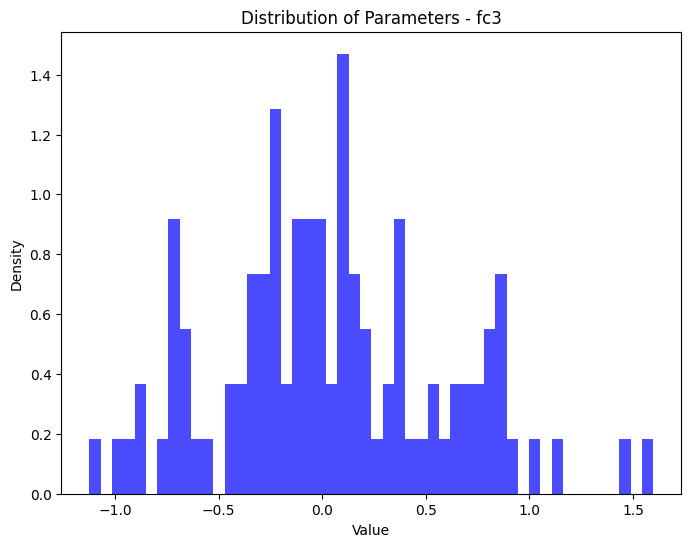

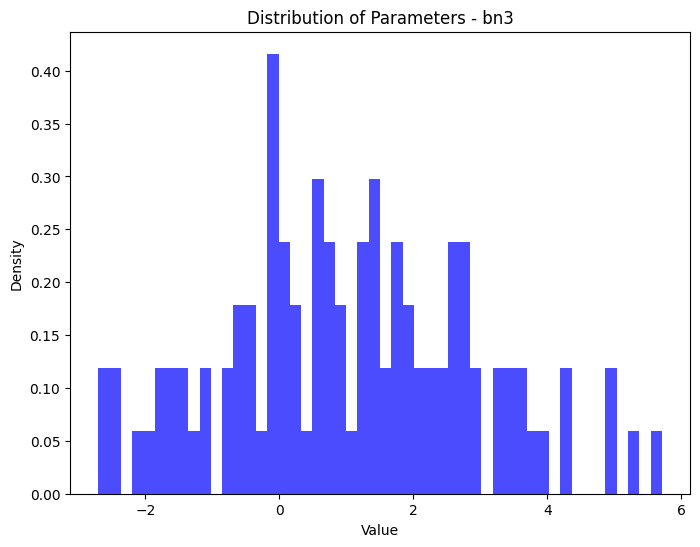

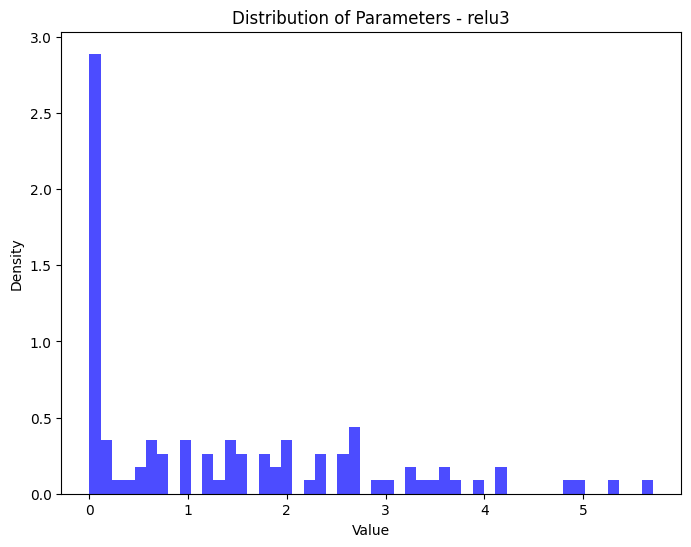

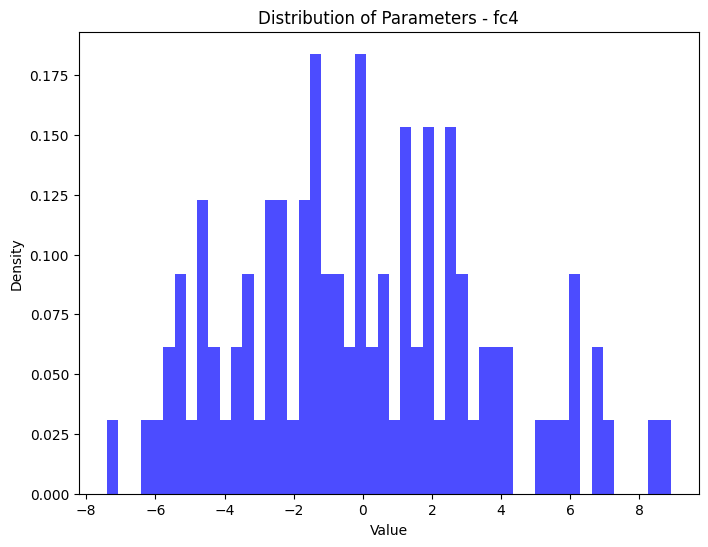

In [21]:
import matplotlib.pyplot as plt

# Generate random input data for visualization
dummy_input = torch.randn(10, 784)  # Batch size of 10

# Forward pass to capture activations
activations = []

with torch.no_grad():
    for layer_name, layer in dnn_model.named_children():
        dummy_input = layer(dummy_input.to(device))
        activation = dummy_input.clone().detach().cpu().numpy()

        plt.figure(figsize=(8, 6))
        plt.hist(activation.flatten(), bins=50, density=True, alpha=0.7, color='blue')
        plt.title(f'Distribution of Parameters - {layer_name}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.show()

Layer 0 (Linear): Mean +0.001012, Std 7.839113e-03
Layer 3 (Linear): Mean +0.000061, Std 2.859138e-02
Layer 6 (Linear): Mean +0.000658, Std 2.910210e-02
Layer 9 (Linear): Mean +0.000000, Std 2.820042e-02


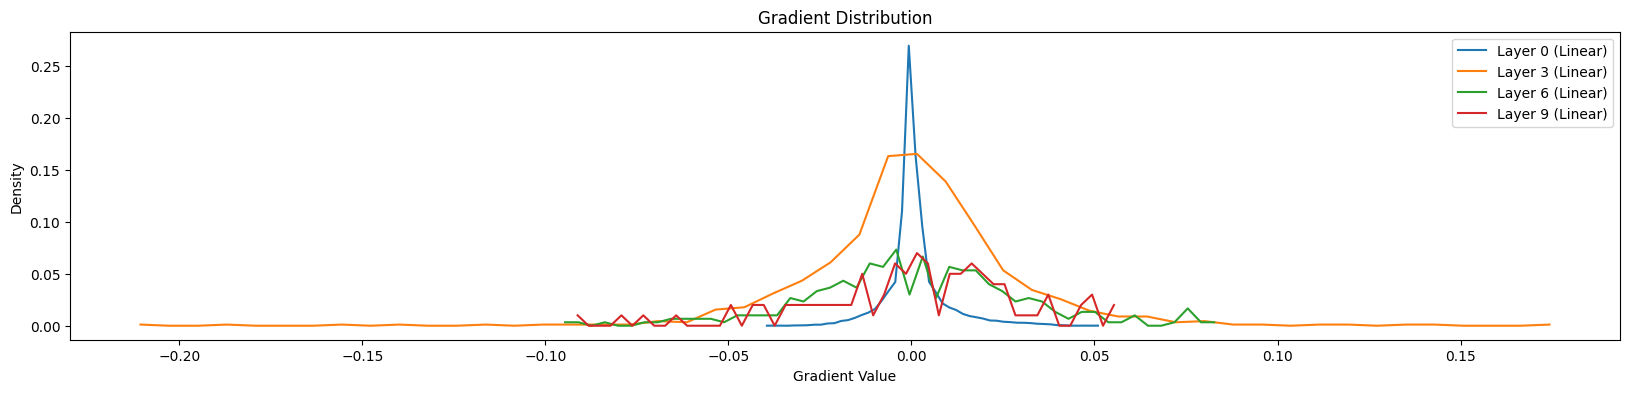

In [22]:
# Plot histograms of gradient distribution
plt.figure(figsize=(20, 4))
legends = []

for i, layer in enumerate(dnn_model.children()):
    if isinstance(layer, nn.Linear):  # Adjust the conditions based on your layer types
        if isinstance(layer, nn.Linear):
            gradients = layer.weight.grad
        
        layer_type = layer.__class__.__name__
        print('Layer %d (%s): Mean %+f, Std %e' % (i, layer_type, gradients.mean(), gradients.std()))
        
        # Use torch.histc to compute the histogram
        hist = torch.histc(gradients.cpu().flatten(), bins=50)
        
        # Normalize the histogram to represent the density
        hist = hist / hist.sum()
        
        hx = torch.linspace(gradients.cpu().min(), gradients.cpu().max(), steps=len(hist))
        
        plt.plot(hx.detach().cpu().numpy(), hist.detach().cpu().numpy())
        legends.append(f'Layer {i} ({layer_type})')

plt.legend(legends)
plt.title('Gradient Distribution')
plt.xlabel('Gradient Value')
plt.ylabel('Density')
plt.show()